In [1]:
import matplotlib.pyplot as plt
import sklearn.datasets as skdata
import numpy as np

%matplotlib inline

In [2]:
numeros = skdata.load_digits()
target = numeros['target']
imagenes = numeros['images']
n_imagenes = len(target)
print(np.shape(imagenes), n_imagenes) # Hay 1797 digitos representados en imagenes 8x8

(1797, 8, 8) 1797


[[ 0.  0.  3. 13. 11.  7.  0.  0.]
 [ 0.  0. 11. 16. 16. 16.  2.  0.]
 [ 0.  4. 16.  9.  1. 14.  2.  0.]
 [ 0.  4. 16.  0.  0. 16.  2.  0.]
 [ 0.  0. 16.  1.  0. 12.  8.  0.]
 [ 0.  0. 15.  9.  0. 13.  6.  0.]
 [ 0.  0.  9. 14.  9. 14.  1.  0.]
 [ 0.  0.  2. 12. 13.  4.  0.  0.]]


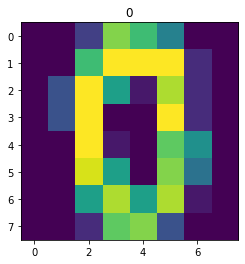

In [3]:
i=20 # este es uno de esos digitos
_ = plt.imshow(imagenes[i])
plt.title('{}'.format(target[i]))
print(imagenes[i])


In [4]:
# para poder correr PCA debemos "aplanar las imagenes"
data = imagenes.reshape((n_imagenes, -1)) # para volver a tener los datos como imagen basta hacer data.reshape((n_imagenes, 8, 8))
print(np.shape(data))

(1797, 64)


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
# Vamos a hacer un split training test
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(data, target, train_size=0.7, test_size=0.3)
x_train2,x_test2, y_train2, y_test2 = train_test_split(data, target, train_size=0.3, test_size=0.7)

In [7]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [8]:
# Vamos a entrenar solamente con los digitos iguales a 1
def pca_imgs(x,y,numero = 1):
    dd = y_train==numero
    cov = np.cov(x_train[dd].T)
    valores, vectores = np.linalg.eig(cov)
    valores = np.real(valores)
    vectores = np.real(vectores)
    ii = np.argsort(-valores)
    valores = valores[ii]
    vectores = vectores[:,ii]

    plt.figure(figsize=(15,5))
    plt.subplot(2,3,1)
    plt.title("Matriz de Covarianza")
    plt.imshow(cov)

    plt.subplot(2,3,2)
    plt.title("Varianza explicada")
    plt.plot(np.cumsum(valores)/np.sum(valores))
    plt.xlabel("Componentes")
    plt.ylabel("Fraccion")
    max_comps = (np.count_nonzero((np.cumsum(valores)/np.sum(valores))<0.6))
    print(max_comps+1) # Necesito este numero de componentes para tener al menos el 60 de la varianza.

    plt.subplot(2,3,4)
    plt.imshow(vectores[:,0].reshape(8,8))
    plt.title('Primer Eigenvector')
    plt.subplot(2,3,5)
    plt.title('Segundo Eigenvector')
    plt.imshow(vectores[:,1].reshape(8,8))
    plt.subplot(2,3,6)
    plt.title('Tercer Eigenvector')
    plt.imshow(vectores[:,2].reshape(8,8))
    plt.subplots_adjust(hspace=0.5)
    return valores, vectores

2
2


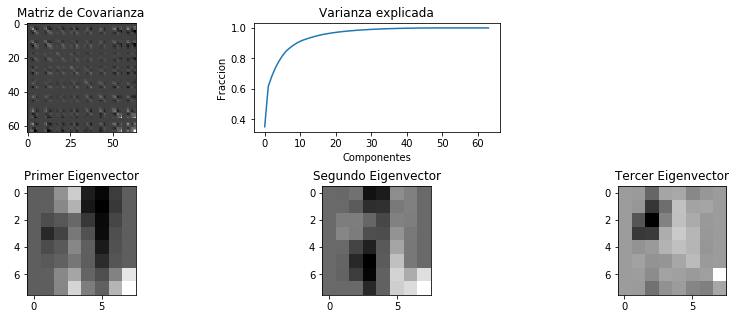

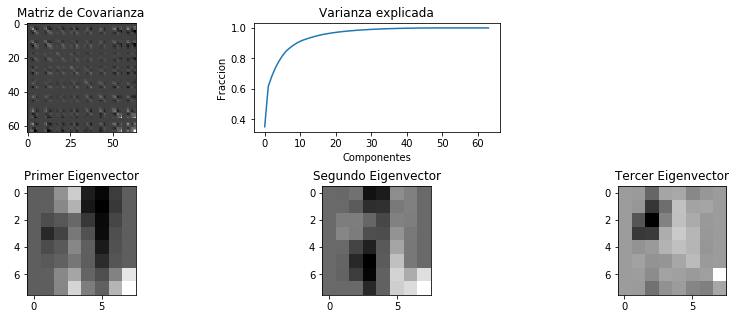

In [18]:
valores_train, vectores_train=pca_imgs(x_train,y_train,numero = 1)
valores_test, vectores_test=pca_imgs(x_test2,y_test2,numero = 1)

In [19]:
#a=[[0,1,2],[0,1,2],[0,1,2]]
#b=[[2,3,4],[2,3,4],[2,3,4]]
eps=0.0001
f_neg=0
t_pos=0
dot_prod=np.zeros(len(vectores_train))
for i in range(len(vectores_train)):
    dot_prod[i]=np.dot(vectores_train[i],vectores_test[i])
    if (np.abs(dot_prod[i])<eps):
        #print("False negative")
        f_neg+=1
    else:
        #print("True positive")
        t_pos+=1
def precision(f_neg,t_pos):
    return t_pos/(t_pos+f_neg)
precision(f_neg,t_pos)

1.0

In [11]:
numeros = skdata.load_digits(1)
target = numeros['target']
imagenes = numeros['images']
n_imagenes = len(target)
print(np.shape(imagenes), n_imagenes)

(178, 8, 8) 178


[[ 0.  0.  4. 13. 12.  1.  0.  0.]
 [ 0.  2. 15. 14. 16. 13.  0.  0.]
 [ 0.  6. 16.  4.  6. 16.  5.  0.]
 [ 0.  8. 15.  1.  0. 12.  8.  0.]
 [ 0.  8. 12.  0.  0. 12.  8.  0.]
 [ 0.  5. 13.  0.  1. 13.  8.  0.]
 [ 0.  1. 15. 10. 12. 16.  3.  0.]
 [ 0.  0.  6. 16. 13.  4.  0.  0.]]


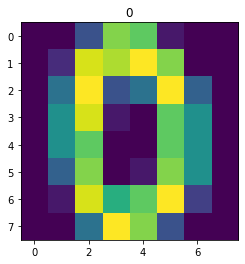

In [12]:
i=40 # este es uno de esos digitos
_ = plt.imshow(imagenes[i])
plt.title('{}'.format(target[i]))
print(imagenes[i])

(1797, 64)


<Figure size 432x288 with 0 Axes>

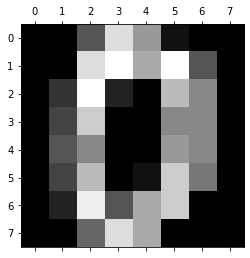

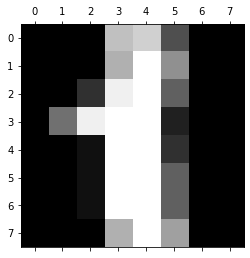

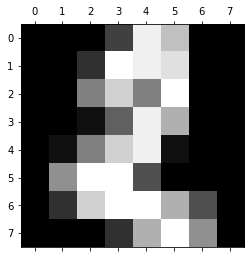

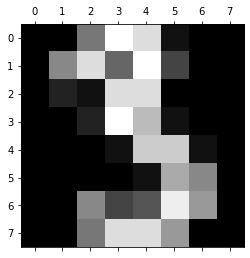

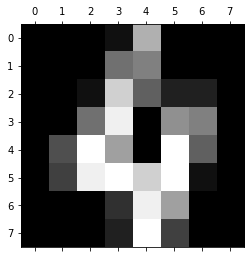

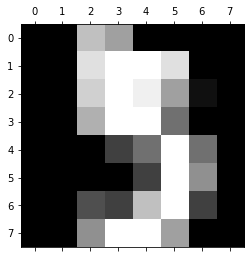

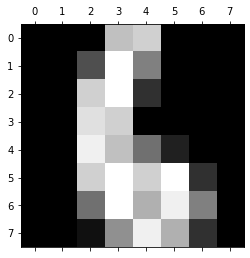

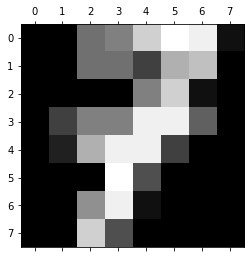

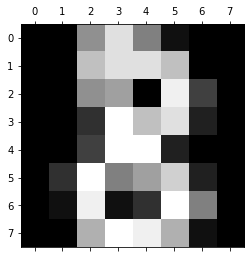

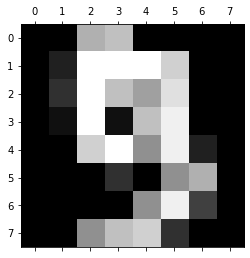

In [13]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
#import matplotlib.pyplot as plt 
plt.gray() 
for i in range(10):
    plt.matshow(digits.images[i]) 
    plt.show() 

In [17]:
print(x_train)
print("a")
print(x_test)

[[ 0.          0.74073066  2.06128984 ...  1.58096379  3.37433477
   0.84693588]
 [ 0.         -0.33444075 -0.88164206 ... -0.79595212 -0.49877451
  -0.19832519]
 [ 0.         -0.33444075 -1.09185148 ... -0.96573183 -0.49877451
  -0.19832519]
 ...
 [ 0.         -0.33444075 -1.09185148 ...  0.39250583 -0.49877451
  -0.19832519]
 [ 0.         -0.33444075 -0.67143264 ...  0.05294642 -0.49877451
  -0.19832519]
 [ 0.         -0.33444075 -1.09185148 ...  1.41118408 -0.25670518
  -0.19832519]]
a
[[ 0.         -0.33444075 -0.2510138  ... -0.62617242 -0.49877451
  -0.19832519]
 [ 0.         -0.33444075 -0.67143264 ...  1.58096379  1.1957108
  -0.19832519]
 [ 0.         -0.33444075 -0.88164206 ... -1.13551154 -0.49877451
  -0.19832519]
 ...
 [ 0.         -0.33444075 -0.04080437 ... -1.13551154 -0.49877451
  -0.19832519]
 [ 0.         -0.33444075  0.16940505 ... -0.11683329 -0.49877451
  -0.19832519]
 [ 0.         -0.33444075 -0.88164206 ... -0.62617242 -0.49877451
  -0.19832519]]
